In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_drivers = pd.read_csv('driver_ids.csv', parse_dates=['driver_onboard_date'])
df_rides = pd.read_csv('ride_ids.csv')
df_rtsp = pd.read_csv('ride_timestamps_pvt.csv', parse_dates=['accepted_at', 'arrived_at', 'dropped_off_at', 'picked_up_at', 'requested_at'])
df_r = pd.read_csv('rides_revenue.csv', parse_dates=['driver_onboard_date', 'dropped_off_at'])

In [223]:
df = df_r[['driver_id', 'driver_onboard_date', 'ride_id', 'dropped_off_at', 'ride_revenue']]

In [224]:
ref_date = pd.datetime(2016,5,16)
print (len(df))
df = df[df['dropped_off_at'] <= ref_date]
df['dropped_off_at'] = df['dropped_off_at'].dt.date
print (len(df))

df = df.groupby('driver_id').agg({'driver_onboard_date':'max', 
                             'ride_revenue':'sum',
                              'dropped_off_at':pd.Series.nunique})
df.reset_index(inplace=True)

df['days_since_onboarding'] = (ref_date - df['driver_onboard_date']).dt.days

df['drive_engage'] = df['dropped_off_at'] / df['days_since_onboarding']


184209
75095


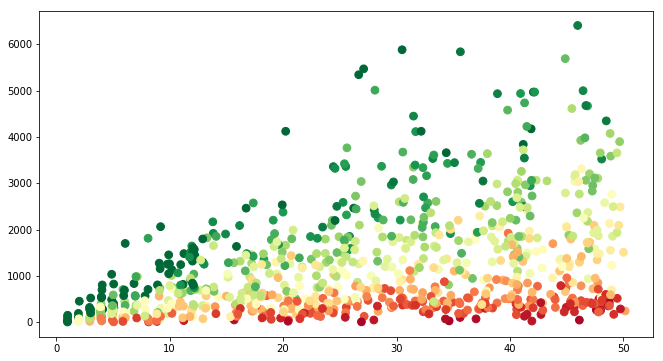

In [260]:
j = ((pd.Series(np.random.random(len(df)))-.5)/20)+1

plt.figure(figsize=(11, 6))
plt.scatter(df['days_since_onboarding'] * j,df['ride_revenue'], alpha=1, c=df['drive_engage'], cmap="RdYlGn", s=60)
plt.show()